In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [84]:
'''
1.a. Load the data in “Gene_Expression_Data.xlsx”, “Gene_Information.csv”, and “Sample_Information.tsv” into Python
'''

default_path = "/Users/sathviksai/Downloads/"

xlsx_file = "Gene_Expression_Data.xlsx"
tsv_file = "Sample_Information.tsv"
csv_file = "Gene_Information.csv"

Gene_Expression_Data = default_path + xlsx_file
Sample_Information = default_path + tsv_file
Gene_Information = default_path + csv_file

# Read Gene_Expression_Data_xlsx file
df_xlsx = pd.read_excel(Gene_Expression_Data)
print("Gene Expression Data DataFrame:")
print(df_xlsx.head())

# Read Sample_Information_TSV file
df_tsv = pd.read_csv(Sample_Information, sep='\t')
print("\nSample Information DataFrame:")
print(df_tsv.head())

# Read Gene_Information_CSV file
df_csv = pd.read_csv(Gene_Information)
print("\nGene Information DataFrame:")
print(df_csv.head())


Gene Expression Data DataFrame:
       Probe_ID   GSM820516   GSM820517   GSM820518   GSM820519   GSM820520  \
0  ILMN_1343291  66665.3800  69404.6700  64128.0700  68943.9700  67827.2200   
1  ILMN_1343295  22040.1100  13046.3400  38678.9600  16641.8900  33719.8900   
2  ILMN_1651199    226.6081    205.4483    217.2475    229.0451    226.3029   
3  ILMN_1651209    278.5710    253.7044    211.8002    278.0423    259.8059   
4  ILMN_1651210    195.4914    195.9835    175.3356    193.9065    229.5674   

    GSM820521   GSM820522   GSM820523   GSM820524   GSM820525   GSM820526  \
0  71775.3000  62245.5900  69713.7000  69509.2700  68244.5900  65427.4700   
1  18933.2900  26170.0400   9906.9130  17166.5200  12428.9500  25297.5700   
2    203.8710    213.4431    210.4129    229.5394    212.7384    226.1345   
3    265.1900    321.2587    273.4458    253.6032    310.1582    275.0126   
4    164.0632    244.6696    190.9813    188.1039    199.3084    220.6229   

    GSM820527   GSM820528   GS

In [85]:
'''
1.b. Change the sample names from the “Gene_Expression_Data.xlsx”, based upon the phenotype presented in “Sample_Information.tsv”
'''


#Extract Sample_names
Sample_names = df_xlsx.columns.tolist()[1:]
print("\nSample_names as List:")
print(Sample_names)


# Read Sample_Information_TSV file
df_tsv = pd.read_csv(Sample_Information, sep='\t')
print("\nSample Information DataFrame:")
print(df_tsv.head())
# Extract Phenotypes
# You have df_tsv loaded from your TSV file 
phenotypes = df_tsv['group'].tolist()
print("\nPhenotypes")
print(phenotypes) 


Sample_names as List:
['GSM820516', 'GSM820517', 'GSM820518', 'GSM820519', 'GSM820520', 'GSM820521', 'GSM820522', 'GSM820523', 'GSM820524', 'GSM820525', 'GSM820526', 'GSM820527', 'GSM820528', 'GSM820529', 'GSM820530', 'GSM820531', 'GSM820532', 'GSM820533']

Sample Information DataFrame:
            group     patient
GSM820516   tumor  patient: 1
GSM820517  normal  patient: 1
GSM820518   tumor  patient: 2
GSM820519  normal  patient: 2
GSM820520   tumor  patient: 3

Phenotypes
['tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal']


In [86]:
# Create a renaming dictionary excluding the first entry ('Probe_ID')
mapping_dict = dict(zip(Sample_names[1:], phenotypes))

# Rename the column names in the Excel file
df_xlsx.rename(columns=mapping_dict, inplace=True)

# Save the updated Excel file with the file path
updated_file_path = "/Users/sathviksai/Downloads/Updated_Gene_Expression_Data.xlsx"
df_xlsx.to_excel(updated_file_path, index=False)

print(df_xlsx.head())

       Probe_ID   GSM820516       tumor      normal       tumor      normal  \
0  ILMN_1343291  66665.3800  69404.6700  64128.0700  68943.9700  67827.2200   
1  ILMN_1343295  22040.1100  13046.3400  38678.9600  16641.8900  33719.8900   
2  ILMN_1651199    226.6081    205.4483    217.2475    229.0451    226.3029   
3  ILMN_1651209    278.5710    253.7044    211.8002    278.0423    259.8059   
4  ILMN_1651210    195.4914    195.9835    175.3356    193.9065    229.5674   

        tumor      normal       tumor      normal       tumor      normal  \
0  71775.3000  62245.5900  69713.7000  69509.2700  68244.5900  65427.4700   
1  18933.2900  26170.0400   9906.9130  17166.5200  12428.9500  25297.5700   
2    203.8710    213.4431    210.4129    229.5394    212.7384    226.1345   
3    265.1900    321.2587    273.4458    253.6032    310.1582    275.0126   
4    164.0632    244.6696    190.9813    188.1039    199.3084    220.6229   

        tumor      normal       tumor      normal       tumor 

In [88]:
'''
1.c. Split the merged data from part c, into to 2 parts, based upon their labeled phenotype (ie. tumor or normal)
'''

# Extract Sample_names
Sample_names = df_xlsx.columns.tolist()[1:]
print("\nSample_names as List:")
print(Sample_names)
print("\n")

# Extract column names (excluding the first column)
column_names = df_xlsx.columns.tolist()[1:]

# Initialize empty lists to store column indices
tumor_indices = []
normal_indices = []

# Iterate through column names and identify indices
for i, name in enumerate(column_names):
    if name.startswith('tumor'):
        tumor_indices.append(i + 1)  # Add 1 to adjust for the exclusion of the first column
    elif name.startswith('normal'):
        normal_indices.append(i + 1)  # Add 1 to adjust for the exclusion of the first column

# Print the identified indices
print("Tumor column indices:", tumor_indices)
print("Normal column indices:", normal_indices)
print("\n")

# Use column indices to extract data from df_xlsx
df_tumor = df_xlsx.iloc[:, [0] + tumor_indices]
df_normal = df_xlsx.iloc[:, [0] + normal_indices]

print("\n")
print("df_tumor dataset")
print(df_tumor.head())

print("\n")
print("df_normal dataset")
print(df_normal.head())

#savefiles
# Save df_tumor to CSV
df_tumor.to_csv('df_tumor.csv', index=False)

# Save df_normal to CSV
df_normal.to_csv('df_normal.csv', index=False)


Sample_names as List:
['GSM820516', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor']


Tumor column indices: [2, 4, 6, 8, 10, 12, 14, 16, 18]
Normal column indices: [3, 5, 7, 9, 11, 13, 15, 17]




df_tumor dataset
       Probe_ID       tumor       tumor       tumor       tumor       tumor  \
0  ILMN_1343291  69404.6700  68943.9700  71775.3000  69713.7000  68244.5900   
1  ILMN_1343295  13046.3400  16641.8900  18933.2900   9906.9130  12428.9500   
2  ILMN_1651199    205.4483    229.0451    203.8710    210.4129    212.7384   
3  ILMN_1651209    253.7044    278.0423    265.1900    273.4458    310.1582   
4  ILMN_1651210    195.9835    193.9065    164.0632    190.9813    199.3084   

        tumor       tumor       tumor       tumor  
0  68436.5200  69959.7700  70063.7700  70332.3400  
1  17535.6000  17854.2900  22849.0800  28747.0100  
2    232.2437    229.2948    216.6758    

In [89]:
'''
1.d Compute the average expression for all genes from the 2 data sets from part d
'''

# Compute the average expression for each gene in df_tumor
average_tumor_in_df_tumor = df_tumor.iloc[:, 1:].mean(axis=1)

# Compute the average expression for each gene in df_normal
average_normal_in_df_normal = df_normal.iloc[:, 1:].mean(axis=1)

# Print the results
print("Average expression for each gene in df_tumor:")
print(average_tumor_in_df_tumor)

print("\nAverage expression for each gene in df_normal:")
print(average_normal_in_df_normal)

#Each element in this series represents the average expression of a gene across all tumor samples
#Both the above datasets will have the average expression values for each gene in the tumor samples. 

#savefiles
average_tumor_in_df_tumor.to_csv('average_tumor_in_df_tumor.csv', index=False)
average_normal_in_df_normal.to_csv('average_normal_in_df_normal.csv', index=False)


Average expression for each gene in df_tumor:
0        69652.736667
1        17549.262556
2          221.320022
3          271.314167
4          188.663967
             ...     
48798      792.658411
48799     1354.958044
48800     1684.671389
48801     5400.365889
48802     1097.125689
Length: 48803, dtype: float64

Average expression for each gene in df_normal:
0        65737.841250
1        28522.307500
2          216.432025
3          255.626300
4          204.220675
             ...     
48798     1072.999700
48799     2252.703625
48800     2107.043375
48801     3257.374875
48802      404.931188
Length: 48803, dtype: float64


In [90]:
'''
1.e. Determine the fold change for each Probe between the two groups ((Tumour – Control) / Control)
'''

# Determine the fold change for each Probe between the two groups
fold_change_probes = (average_tumor_in_df_tumor - average_normal_in_df_normal) / average_normal_in_df_normal

# Print the results
print("Fold change for each Probe between Tumor and Normal:")
print(fold_change_probes)

#savefiles
fold_change_probes.to_csv(default_path + 'fold_change_probes.csv', index=False)

Fold change for each Probe between Tumor and Normal:
0        0.059553
1       -0.384718
2        0.022584
3        0.061370
4       -0.076176
           ...   
48798   -0.261269
48799   -0.398519
48800   -0.200457
48801    0.657889
48802    1.709413
Length: 48803, dtype: float64


In [91]:
'''
1.f. Use the data from part e and “Gene_Information.csv” 
to identify all genes fold change magnitude (absolute value) was greater than 5
'''

# Load your gene information 
default_path = "/Users/sathviksai/Downloads/"
csv_file  = pd.read_csv(default_path + "Gene_Information.csv")

# Combine into a new DataFrame
merged_df = pd.concat([csv_file, fold_change_probes], axis=1)

# Save the merged DataFrame
merged_df.to_csv("merged_data.csv", index=False)
print(merged_df.head())


       Probe_ID     Symbol  Entrez_Gene_ID Chromosome   Cytoband         0
0  ILMN_1343291     EEF1A1          1915.0          6      6q13c  0.059553
1  ILMN_1343295      GAPDH          2597.0         12  12p13.31d -0.384718
2  ILMN_1651199  LOC643334        643334.0        NaN    2q37.3b  0.022584
3  ILMN_1651209    SLC35E2          9906.0          1   1p36.33a  0.061370
4  ILMN_1651210     DUSP22         56940.0        NaN    6p25.3b -0.076176


In [92]:
column_6 = merged_df.iloc[:, 5] #column6 - fold values
print(column_6.head())
print("\n")

values_greater_than_5 = column_6[column_6 > 5] #values
indices_greater_than_5 = values_greater_than_5.index.tolist()  #indices

result = list(zip(indices_greater_than_5, values_greater_than_5)) 
print(result)

0    0.059553
1   -0.384718
2    0.022584
3    0.061370
4   -0.076176
Name: 0, dtype: float64


[(310, 52.255122421797324), (1448, 8.540060129001956), (2660, 5.672749972836873), (5597, 5.060241234247949), (5727, 5.42895874023023), (6079, 16.359227103991408), (6125, 7.4681091622270594), (7225, 5.627866460999598), (7449, 5.792829817565682), (9174, 10.038316042800377), (9256, 6.479524662868673), (10635, 28.16524087150608), (10872, 6.7878679068758725), (11515, 7.404527115454466), (12453, 55.25067660454581), (12813, 5.4694974628838064), (14303, 16.445765919203687), (15480, 12.127008062198858), (15539, 5.189275591124625), (15968, 8.957468957553695), (16073, 19.293778906957872), (16958, 6.245179755291662), (16993, 7.004858281467458), (17891, 11.162610960541631), (18606, 5.665214679403122), (18766, 5.801996598110471), (19973, 10.528495554191025), (20232, 9.15076968328731), (20560, 30.461296400548726), (20645, 7.81438067849624), (20957, 5.009355054587207), (21802, 7.002282032294514), (24896, 7.

In [93]:
#corresponding genes for the thresholded indices
corresponding_rows = merged_df.loc[indices_greater_than_5, :]

corresponding_entrez_ids = corresponding_rows["Entrez_Gene_ID"]
print(corresponding_entrez_ids)


310         759.0
1448       4499.0
2660        760.0
5597      84417.0
5727       6366.0
6079      22802.0
6125     256691.0
7225       5166.0
7449       6368.0
9174        762.0
9256      63928.0
10635      5697.0
10872    342035.0
11515      1805.0
12453       343.0
12813     92736.0
14303      2641.0
15480     54860.0
15539      5105.0
15968      8671.0
16073      2981.0
16958       126.0
16993      6338.0
17891      9073.0
18606    401321.0
18766      7367.0
19973      1811.0
20232       766.0
20560      2980.0
20645       124.0
20957    221476.0
21802    388364.0
24896      6387.0
24902    171024.0
25717    266675.0
27616      7367.0
28281      6750.0
28464      1087.0
28510    140803.0
41946     10022.0
42141      9073.0
43004    123887.0
43066      4496.0
43979       590.0
44415       760.0
46667      5570.0
47946     80333.0
Name: Entrez_Gene_ID, dtype: float64


In [94]:
'''
1.g. Add a column to the result of part f 
to include if the gene was higher expressed in “Normal” or “Tumor” sample
'''

#Create a List for the New Column Values
#With the same size as your DataFrame and initially fill it with the value 'low expression

#Later We iterate through the indices_greater_than_5 list and 
#replace the corresponding elements in new_column_values with 'high expression'.
new_column_values = ['low expression'] * len(merged_df)  
for index in indices_greater_than_5:
    new_column_values[index] = 'high expression' 

#We create a new column named 'Expression_Level' 
#in the merged_df DataFrame and assign the values from new_column_values.
merged_df['Expression_Level'] = new_column_values


print(merged_df)
print('\n')

print('column names are')
print(merged_df.iloc[0])

           Probe_ID     Symbol  Entrez_Gene_ID Chromosome      Cytoband  \
0      ILMN_1343291     EEF1A1          1915.0          6         6q13c   
1      ILMN_1343295      GAPDH          2597.0         12     12p13.31d   
2      ILMN_1651199  LOC643334        643334.0        NaN       2q37.3b   
3      ILMN_1651209    SLC35E2          9906.0          1      1p36.33a   
4      ILMN_1651210     DUSP22         56940.0        NaN       6p25.3b   
...             ...        ...             ...        ...           ...   
48798  ILMN_2415911      ENOX2         10495.0          X  Xq25h-q26.1a   
48799  ILMN_2415926      THOC3         84321.0          5       5q35.2c   
48800  ILMN_2415949       MRRF         92399.0          9       9q33.2b   
48801  ILMN_2415979   KIAA1751         85452.0          1      1p36.33a   
48802  ILMN_2416019     ENTPD8        377841.0          9       9q34.3f   

              0 Expression_Level  
0      0.059553   low expression  
1     -0.384718   low express

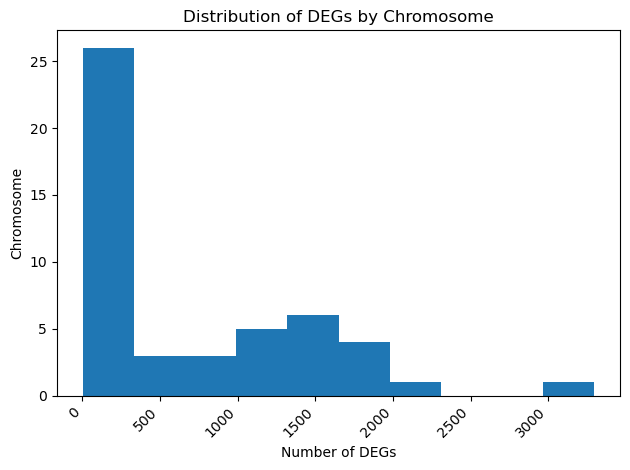

In [179]:
'''
2.b. Create a histogram showing the distribution of the number of differentially expressed genes 
(DEGs) by chromosome
'''

# Counts of DEGs per chromosome (Assuming you have this calculated)
n_degs_per_chromosome = merged_df['Chromosome'].value_counts()

# Create the histogram directly from the Series
plt.hist(n_degs_per_chromosome)
# Labels and Title
plt.xlabel('Number of DEGs')
plt.ylabel('Chromosome')
plt.title('Distribution of DEGs by Chromosome')
# Rotate x-axis labels 
plt.xticks(rotation=45, ha='right')  
# Ensure good layout
plt.tight_layout()
plt.show()



In [151]:
'''
2.c. Make another histogram showing the distribution of DEGs by chromosome 
segregated by sample type (Normal or Tumor)
'''

# Define DEGs
threshold = 5.0
tumor_sample = merged_df[merged_df.iloc[:, 5] > threshold]
normal_sample = merged_df[merged_df.iloc[:, 5] <= threshold]
#print(tumor_sample)


# Get DEG counts per chromosome (Tumor)
DEGS_tumor = tumor_sample['Chromosome'].value_counts()
#print(len(DEGS_tumor))
#print('\n')


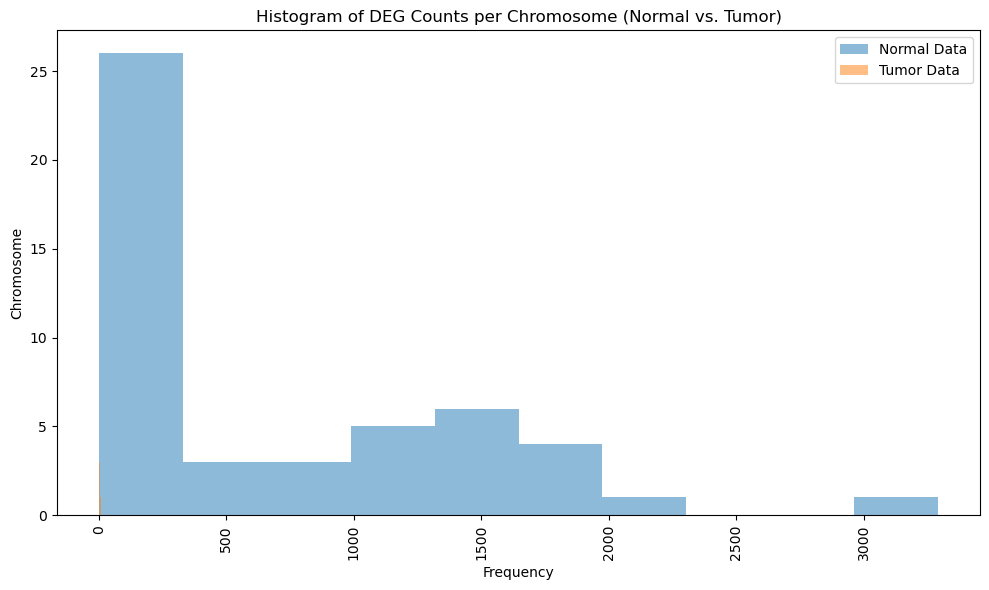

In [165]:
# Get DEG counts per chromosome (Normal)
DEGS_normal = normal_sample['Chromosome'].value_counts()
#print('DEGS_normal')
#print(DEGS_normal )
#print('\n')

# Get DEG counts per chromosome (Tumor)
DEGS_tumor = tumor_sample['Chromosome'].value_counts()
#print('DEGS_tumor')
#print(DEGS_tumor)

#plotting
# Create separate histograms for normal and tumor data with transparency
plt.figure(figsize=(10, 6))

plt.hist(DEGS_normal, bins=10, alpha=0.5, label='Normal Data')
plt.hist(DEGS_tumor, bins=10, alpha=0.5, label='Tumor Data')

plt.xlabel('Frequency')
plt.ylabel('Chromosome')
plt.title('Histogram of DEG Counts per Chromosome (Normal vs. Tumor)')
plt.legend()
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()

plt.show()


number of up regulated genes
47


number of down regulated genes
48756
upregulated_percent  = (47/48803)* 100
upregulated_percent
0.09630555498637379


downregulated_percent = (48756/48803)* 100
downregulated_percent
99.90369444501363


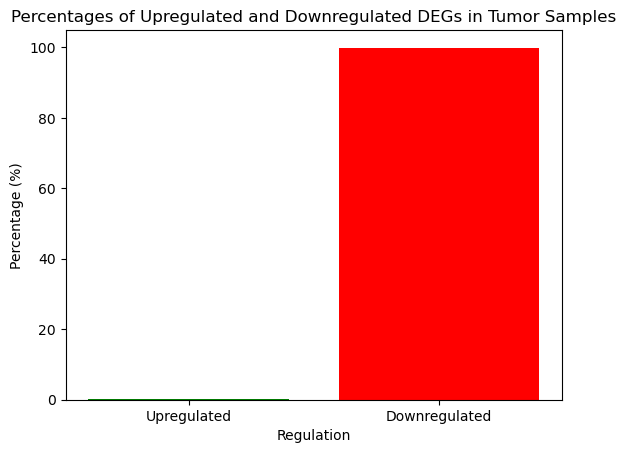

In [172]:
'''
2.d. Create a bar chart showing the percentages of the DEGs 
that are upregulated (higher) in Tumor samples and down regulated (lower) in Tumor samples
'''

#upregulated_percent = (upregulated_count / total) * 100
tumor_sample = merged_df[merged_df.iloc[:, 5] > threshold]
print('number of up regulated genes')
print(len(tumor_sample)) #47
print('\n')

#downregulated_percent = (downregulated_count / total) * 100
normal_sample = merged_df[merged_df.iloc[:, 5] <= threshold]
print('number of down regulated genes')
print(len(normal_sample)) #48756


# Sample Data (Adjust with your calculated values)
upregulated_percent = (47/48803)* 100
print('upregulated_percent  = (47/48803)* 100')
print('upregulated_percent')
print(upregulated_percent)
print('\n')
downregulated_percent = (48756/48803)* 100
print('downregulated_percent = (48756/48803)* 100')
print('downregulated_percent')
print(downregulated_percent)

# Create the plot
labels = ['Upregulated', 'Downregulated']
values = [upregulated_percent, downregulated_percent]

plt.bar(labels, values, color=['green', 'red'])  
plt.xlabel('Regulation')
plt.ylabel('Percentage (%)')
plt.title('Percentages of Upregulated and Downregulated DEGs in Tumor Samples')
plt.show()


In [184]:
'''
2.e. Use the raw data from part 1b to create a heatmap visualizing gene expression by sample
'''
import seaborn as sns 
df = pd.DataFrame(df_xlsx) #from 1b.
df = df.drop('Probe_ID', axis=1)  # Remove the Probe_ID colum
df

,GSM820516,tumor,normal,tumor,normal,tumor,normal,tumor,normal,tumor,normal,tumor,normal,tumor,normal,tumor,normal,tumor
0,66665.3800,69404.6700,64128.0700,68943.9700,67827.2200,71775.3000,62245.5900,69713.7000,69509.2700,68244.5900,65427.4700,68436.5200,57608.6700,69959.7700,69509.2700,70063.7700,69647.1700,70332.3400
1,22040.1100,13046.3400,38678.9600,16641.8900,33719.8900,18933.2900,26170.0400,9906.9130,17166.5200,12428.9500,25297.5700,17535.6000,19749.1400,17854.2900,43670.6800,22849.0800,23725.6600,28747.0100
2,226.6081,205.4483,217.2475,229.0451,226.3029,203.8710,213.4431,210.4129,229.5394,212.7384,226.1345,232.2437,208.7316,229.2948,214.4033,216.6758,195.6539,252.1502
3,278.5710,253.7044,211.8002,278.0423,259.8059,265.1900,321.2587,273.4458,253.6032,310.1582,275.0126,274.9519,250.6420,255.8540,219.5752,292.4965,253.3126,237.9844
4,195.4914,195.9835,175.3356,193.9065,229.5674,164.0632,244.6696,190.9813,188.1039,199.3084,220.6229,213.3975,194.7746,173.7073,185.3380,174.6898,195.3534,191.9382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48798,965.4537,1084.3610,975.9432,692.3060,1306.9460,947.1885,837.6633,587.1460,833.9681,852.5927,1234.8830,716.9376,1254.8400,835.5988,1034.8450,731.5306,1104.9090,686.2645
48799,3583.4440,1152.4940,2049.1500,913.1962,1996.2160,1336.6350,1693.9640,902.1262,2569.1790,1317.9910,3384.6820,1741.8400,1978.3250,1048.7180,2644.4420,1294.8670,1705.6710,2486.7550
48800,2282.5570,822.8831,2359.0100,1630.6520,2951.5930,2222.9580,2120.2090,1810.6850,1535.9080,977.6974,1849.7140,1922.0240,2400.9900,1626.1940,2502.9950,1918.5350,1135.9280,2230.4140
48801,2389.5440,3323.9100,2554.8810,9655.9170,4155.8250,5872.2260,3631.8960,6146.9280,2984.1830,4123.6540,5451.1860,7398.6830,2048.6720,3455.2030,2476.3410,4164.1320,2756.0150,4462.6400


In [ ]:
plt.figure(figsize=(12, 8))  # Adjust figure size
sns.heatmap(df, annot=True, fmt='.1f', cmap='coolwarm')  # cmap for color scheme
plt.title('Gene Expression Heatmap') 
plt.show()

In [ ]:
'''
2.f. Use the same data from the previous part to create a clustermap visualizing gene expression by sample
'''
sns.clustermap(df, standard_scale=1,  # Standardize data for better clustering
               row_linkage=linkage_matrix, col_linkage=linkage_matrix,
               cmap='coolwarm', figsize=(12, 8))
plt.show()